In [1]:
import pandas as  pd
from pylab import *
import numpy as np
%matplotlib inline

In [2]:
H_alvino = pd.read_excel("../../data/external/alvino_2007/alvino_suppl_data4.xls")
print(H_alvino.head())

timesA  = ["40","80A","120A","240A","300A"]
timesB  = ["40","80B","120B","240B","300B"]
times_c = [40,80,120,240,300]

   chr  coord  %HL: 40  %HL: 80A  %HL: 80B  %HL: 120A  %HL: 120B  %HL: 240A  \
0    1     13  2.18524   13.6297   8.70009    14.8435    12.6161    23.0870   
1    1     14  2.17636   13.4895   9.09868    14.3425    13.1040    22.7269   
2    1     15  2.17302   13.4392   9.56540    14.0302    13.7029    22.6274   
3    1     16  2.17357   13.4748  10.05790    13.9050    14.3575    22.7615   
4    1     17  2.17644   13.5649  10.52650    13.9241    14.9948    23.0532   

   %HL: 240B  %HL: 300A  %HL: 300B  
0    26.0376    37.0686    44.7999  
1    25.0774    35.2738    40.8244  
2    24.5145    33.6462    37.3454  
3    24.3344    32.2434    34.4694  
4    24.4494    31.0812    32.2097  


# for one chromosome

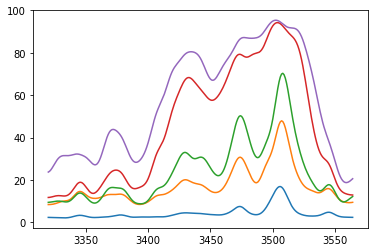

In [3]:
times = timesA
for time in times:
    plot(H_alvino[H_alvino.chr == 6]["%HL: "+ time])

In [4]:
#Copy number as a function of time
CNT = []
for time,time_c in zip(times,times_c):
    CNT.append(np.array(H_alvino[H_alvino.chr == 6]["%HL: "+ time]))
CNT = np.array(CNT)


# Fit of one time point

[ -3.57279457e+00   9.27943636e-04]
Trep = 743.398415037


(0, 100)

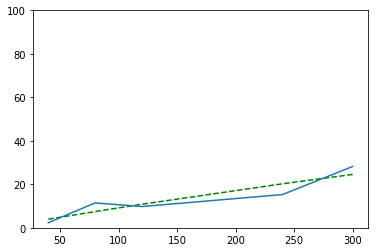

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

def func(t,a,b):
    return 100*(1-np.exp(-(t-a)*b))

xdata= times_c
ydata = CNT[::,40]
popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
print(popt)
plot(xdata, func(xdata, *popt), 'g--')
plot(xdata,ydata)
print("Trep =",popt[0]+np.log(2)/popt[1] )
#def Trep(times,x):
ylim(0,100)
        
    

# fit of all locus on the chromosome

In [6]:
Trep = []
p0 = [9,0.05]
for xi in CNT.T:
    xdata= times_c
    ydata=xi
    popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
    Trep.append(popt[0]+np.log(2)/popt[1] )
    

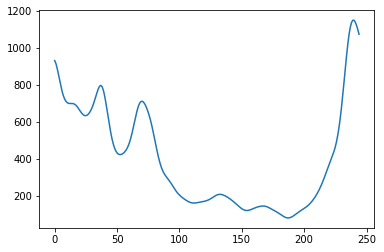

In [7]:
plot(Trep)

# Genome wide and for both replica

In [8]:


for times,rep in zip([timesA,timesB],["A","B"]):
    CNT = []
    for time,time_c in zip(times,times_c):
        CNT.append(np.array(H_alvino["%HL: "+ time]))
    #plot(np.mean(MRT,axis=0)/100)
    CNT = np.array(CNT)

    Trep = []
    p0 = [9,0.05]
    for xi in CNT.T:
        xdata= times_c
        ydata=xi
        popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
        Trep.append(popt[0]+np.log(2)/popt[1] )
    #plot(Trep)
    
    H_alvino["Trep%s" % rep] = Trep                               

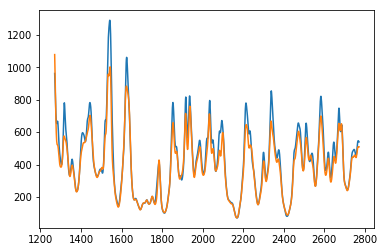

In [9]:
plot(H_alvino[H_alvino.chr == 4]["TrepA"])
plot(H_alvino[H_alvino.chr == 4]["TrepB"])

(array([ 165.,  544.,  935.,  968.,  959.,  820.,  792.,  870.,  770.,
         691.,  645.,  616.,  539.,  460.,  344.,  310.,  242.,  263.,
         202.,  148.,   89.,   77.,   46.,   38.,   24.,    9.,   17.,
           8.,    2.,    2.]),
 array([   70.29951529,   103.94278479,   137.58605429,   171.22932379,
          204.87259329,   238.51586279,   272.15913229,   305.80240179,
          339.44567129,   373.08894079,   406.73221028,   440.37547978,
          474.01874928,   507.66201878,   541.30528828,   574.94855778,
          608.59182728,   642.23509678,   675.87836628,   709.52163577,
          743.16490527,   776.80817477,   810.45144427,   844.09471377,
          877.73798327,   911.38125277,   945.02452227,   978.66779177,
         1012.31106127,  1045.95433076,  1079.59760026]),
 <a list of 30 Patch objects>)

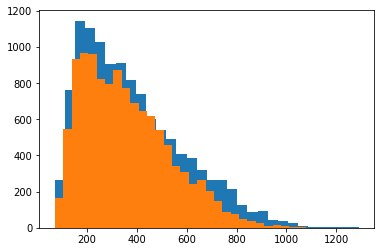

In [10]:
hist(H_alvino["TrepA"],bins=30)
hist(H_alvino["TrepB"],bins=30)

In [11]:
for rep in ["A","B"]:
    yes_no = []
    for ch in range(1,17):
        MRT = H_alvino[H_alvino.chr == ch]["Trep"+rep]
        yes_no.append(0)
        for i,j,k in zip(MRT[2:],MRT[1:-1],MRT[:-2]):
            if i>j and k > j:
                yes_no.append(1)
            else:
                yes_no.append(0)
        yes_no.append(0)
    #print(len(yes_no),len(H_alvino))
    print(np.sum(yes_no))
    H_alvino["peak"+rep] = yes_no

    

295
290


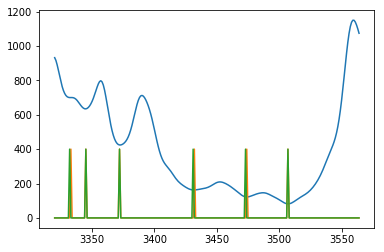

In [12]:
plot(H_alvino[H_alvino.chr == 6]["TrepA"])
plot(H_alvino[H_alvino.chr == 6]["peakA"]*400)
plot(H_alvino[H_alvino.chr == 6]["peakB"]*400)

#plot(H_alvino[H_alvino.chr == 4]["TrepB"])

(array([ 66.,  69.,  58.,  38.,  27.,  14.,  11.,   5.,   1.,   1.]),
 array([  70.29951529,  158.14183408,  245.98415286,  333.82647164,
         421.66879042,  509.5111092 ,  597.35342799,  685.19574677,
         773.03806555,  860.88038433,  948.72270311]),
 <a list of 10 Patch objects>)

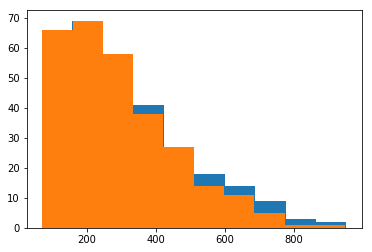

In [13]:
hist(H_alvino["TrepA"][list(map(bool,H_alvino["peakA"]))])
hist(H_alvino["TrepB"][list(map(bool,H_alvino["peakB"]))])

# Compute f(t)

[  3.03127764e+02   8.60277821e-03]
[  3.00208546e+02   9.07246559e-03]
[  2.50000000e+02   9.84079417e-03]
[  3.02859589e+02   8.75735146e-03]
[  2.57391116e+02   1.02794841e-02]
[  2.61680563e+02   9.50387925e-03]
[  2.88397377e+02   9.40744558e-03]
[  3.03485194e+02   9.31405801e-03]
[  2.64644737e+02   1.01761451e-02]
[  2.73670846e+02   9.47064908e-03]
[  2.85361853e+02   9.81209372e-03]
[  2.86612000e+02   9.23105686e-03]
[  2.67650705e+02   9.88981117e-03]
[  3.21318503e+02   8.82393107e-03]
[  2.84400787e+02   9.64055901e-03]
[  2.96787552e+02   9.52883136e-03]
[  3.07352770e+02   8.61800830e-03]
[  2.91830470e+02   9.34076938e-03]
[  2.50000000e+02   9.84799603e-03]
[  2.94769650e+02   8.99140919e-03]
[  2.52789534e+02   1.05492956e-02]
[  2.59210848e+02   9.64073642e-03]
[  2.82706822e+02   9.54140327e-03]
[  2.97925516e+02   9.51570914e-03]
[  2.61344877e+02   1.02926789e-02]
[  2.68295586e+02   9.65405858e-03]
[  2.78895572e+02   9.94511742e-03]
[  2.82606190e+02   9.219244

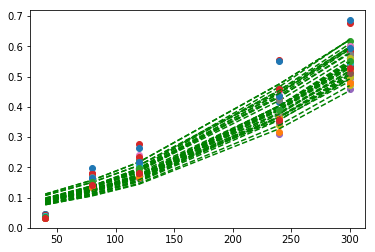

In [33]:
D = pd.DataFrame({"Time":times_c})
Optp = {}
for times,rep in zip([timesA,timesB],["A","B"]):
    fracDNA = []

    times_c= np.array(times_c)
    for time in times:
        fracDNA.append(np.sum(H_alvino["%HL: "+  time])/100/len(H_alvino))
    plot(times_c,fracDNA,"o")
    D["f(t)" + rep] = fracDNA
    
    
    def func(t,a,b):
        #b=0.2
        #print(t,a,b)
        return 1/(1+np.exp(-(t-a)*b))


    popt, pcov = curve_fit(func, np.array(times_c), fracDNA,p0=[300,0.15],bounds=[[250,0.001],[400,0.5]])
    #popt = [25,0.15]
    plot(times_c, func(np.array(xdata), *popt), 'g--')
    Optp["f(t)" + rep] = popt
    
    
    for ch in range(1,17):
        fracDNA = []
        for time in times:
            fracDNA.append(np.sum(H_alvino[H_alvino.chr == ch]["%HL: "+  time])/100/len(H_alvino[H_alvino.chr == ch]))
        plot(times_c,fracDNA,"o")
        D["f(t)_%i"%ch + rep] = fracDNA
        
    
        def func(t,a,b):
            #b=0.2
            #print(t,a,b)
            return 1/(1+np.exp(-(t-a)*b))


        popt, pcov = curve_fit(func, np.array(times_c), fracDNA,p0=[300,0.15],bounds=[[250,0.0001],[400,0.5]])
        print(popt)
        #popt = [25,0.15]
        plot(times_c, func(np.array(xdata), *popt), 'g--')
        Optp["f(t)_%i"%ch  + rep] = popt
    
   



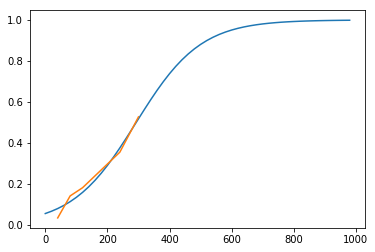

In [56]:
dt = 20
Time= np.arange(0,1000,dt)

plot(Time,func(Time,*popt))

plot(times_c,fracDNA)

# And now I(t)

In [89]:
def Ith(t,v,a,b):
      return b**2*np.exp(-(t-a)*b)/(1+np.exp(-(t-a)*b))**2 / 2 / v

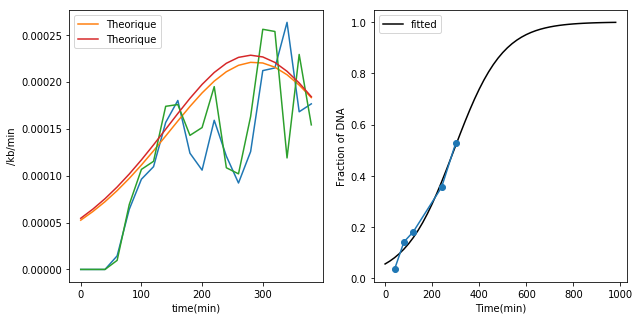

In [93]:
f = figure(figsize=(10,5))
ax = f.add_subplot(121) 
npoints = 20

D = pd.DataFrame({"Time":Time[:npoints]})
peak_time_A = H_alvino["TrepA"][list(map(bool,H_alvino["peakA"]))]
peak_time_B = H_alvino["TrepB"][list(map(bool,H_alvino["peakB"]))]

for peak_time,rep in zip([peak_time_A,peak_time_B],["A","B"]):
    
    I = []
    for time in Time[:npoints]:
        n = np.sum( (peak_time > time -dt/2) & (peak_time < time +dt) )
        unrep = (1-func(time,*Optp["f(t)"+rep])) * len(H_alvino)
        I.append(n/unrep/dt)
    
    plot(Time[:npoints],I)
    D["I_rep"+rep] = I
  
    plot(D["Time"][:50],Ith(D["Time"][:50],1.5/30,*Optp["f(t)"+rep]),label="Theorique")

    
    for ch in range(1,17):
        I = []
        peak_time = H_alvino[H_alvino.chr == ch]["Trep" +rep][list(map(bool,H_alvino[H_alvino.chr == ch]["peak" + rep]))]
        for time in Time[:npoints]:
            n = np.sum( (peak_time > time -dt/2) & (peak_time < time +dt) )
            unrep = (1-func(time,*Optp["f(t)_%i"%ch+rep])) * len(H_alvino[H_alvino.chr == ch])
            I.append(n/unrep/dt)

        #plot(Time[:npoints],I)
        D["I_rep_%i"%ch+rep] = I
    
    
ylabel("/kb/min")
xlabel("time(min)");
legend(loc="best")

ax = f.add_subplot(122) 
D["frac"] = func(Time[:npoints],*popt)
plot(Time,func(Time,*popt),"-k",label="fitted")

plot(times_c,fracDNA,"-o")
xlabel("Time(min)")
ylabel("Fraction of DNA")
legend(loc="best")
D.to_csv("Alvino_H.csv")

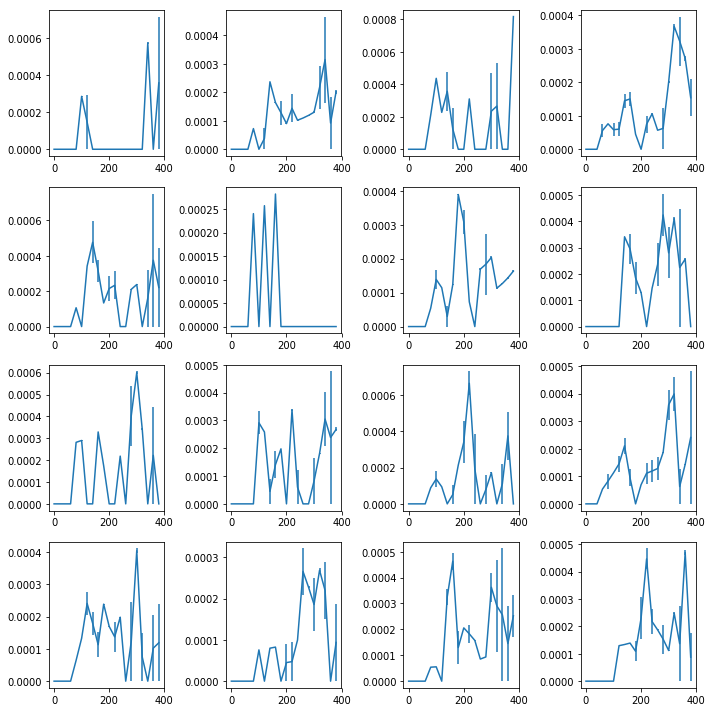

In [78]:
f = figure(figsize=(10,10))
INo = pd.DataFrame({"name":["chr%i" %i for i in range(1,17)] + ["global"]})
Imax = []
                   
for i in range(1,17):
    ax = f.add_subplot(4,4,i)
    r = []
    for rep in ["A","B"]:
        r.append(D["I_rep_%i"%i+rep])
    errorbar(D["Time"][:50],np.average(r,axis=0)[:50],np.std(r,axis=0)[:50])
    Imax.append(max(np.average(r,axis=0)[:50]))
    
Imax.append( max(np.average([D["I_repA"],D["I_repB"]],axis=0)))
f.tight_layout()
INo["Imax"] = Imax

In [79]:
Ori = pd.read_csv("../../data/external/oridb.csv","\t")
INo["nori"] = [len(Ori[Ori.chr == i]) for i in range(1,17) ]+[ len(Ori)]

info = pd.read_csv("../../data/external/saccharomyces_cerevisiae_R64-2-1_20150113.gff",sep="\t",comment="#",
           names=["chr","sgd","type","start","end","un1","un2","un3","idd"])
info.head(20)
l = [info.iloc[i]["end"] for i,is_ch in enumerate(info["type"]=="chromosome") if is_ch][:-1]
l += [sum(l)]
INo["chrlength"] = l

/home/jarbona/miniconda3/envs/ifromprof/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


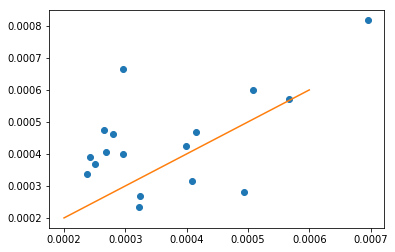

In [83]:
INo["rho"] = 1000 *INo["nori"] / INo["chrlength"]
INo["Estimated Imax"] = 1.5*INo["rho"]**2 / 30

plot(1.5*INo["rho"]**2/22,INo["Imax"],"o")
plot([0.0002,0.0006],[0.0002,0.0006])
INo.to_csv("single_ch_analysis_H.csv")

In [84]:
INo

,name,Imax,nori,chrlength,rho,Estimated Imax
0,chr1,0.000573,21,230218.0,0.091218,0.000416
1,chr2,0.000315,63,813184.0,0.077473,0.000300
2,chr3,0.000818,32,316620.0,0.101068,0.000511
3,chr4,0.000367,93,1531933.0,0.060708,0.000184
4,chr5,0.000476,36,576874.0,0.062405,0.000195
5,chr6,0.000282,23,270161.0,0.085134,0.000362
6,chr7,0.000389,65,1090940.0,0.059582,0.000177
7,chr8,0.000424,43,562643.0,0.076425,0.000292
8,chr9,0.000600,38,439888.0,0.086386,0.000373
9,chr10,0.000338,44,745751.0,0.059001,0.000174
